Difference from neid_fiesta_daily.ipynb:
Weightd average in the uncertainties 

In [1]:
import sys
sys.path.append('../src')

import numpy as np
import matplotlib.pyplot as plt
from PyAstronomy import pyasl
from datetime import datetime

from FIESTA_functions import *
from HARPS_N_functions import *
from NEID_solar_functions import *
from functions import *
#----------------------------------
# Read data
#----------------------------------


In [2]:
if 1:
    v_grid  = np.loadtxt('../lib/data_v4/v_grid.txt')
    CCF     = np.loadtxt('../lib/data_v4/CCF.txt')
    σCCF   = np.loadtxt('../lib/data_v4/σCCF.txt')
    bjd     = np.loadtxt('../lib/data_v4/bjd.txt')
    rv      = np.loadtxt('../lib/data_v4/rv.txt')
    σrv     = np.loadtxt('../lib/data_v4/σrv.txt')
    idx_rej = np.array(np.loadtxt('../lib/data_v4/idx_rej'), dtype=bool)
    
    # idx_v = (v_grid>90.25) & (v_grid<107.5)
    # v_grid = v_grid[idx_v]
    
    CCF = CCF[:,~idx_rej]
    σCCF = σCCF[:,~idx_rej]
    # CCF = CCF[idx_v,:]
    # σCCF = σCCF[idx_v,:]    
    bjd = bjd[~idx_rej]
    rv = rv[~idx_rej]
    σrv = σrv[~idx_rej]

In [87]:
weighted_avg_and_std(rv, 1/σrv**2), weighted_avg_and_std(rv_daily, 1/σrv_daily**2)

((-640.7388741816881, 1.4227938184859392),
 (-640.7388741816881, 1.099330039296157))

In [84]:
(0.48**2-np.mean(σrv)**2-0.28**2)**0.5

0.29890919499008656

In [3]:
max(v_grid), min(v_grid)

(110.75, 87.25)

In [4]:
if 0:
    v_grid  = np.loadtxt('../lib/data_526_625/v_grid.txt')
    CCF     = np.loadtxt('../lib/data_526_625/CCF.txt')
    σCCF   = np.loadtxt('../lib/data_526_625/σ_CCF.txt')
    bjd     = np.loadtxt('../lib/data_526_625/bjd.txt')
    rv      = np.loadtxt('../lib/data_526_625/rv.txt')
    σrv     = np.loadtxt('../lib/data_526_625/σrv.txt')

    idx_t = (bjd<2459392) & (bjd>2459361)

    CCF = CCF[idx_v,idx_t]
    σCCF = σCCF[idx_v,idx_t]
    bjd = bjd[idx_t]
    rv = rv[idx_t]
    σrv = σrv[idx_t]


In [5]:
σCCF.shape, CCF.shape, v_grid.shape

((95, 31145), (95, 31145), (95,))

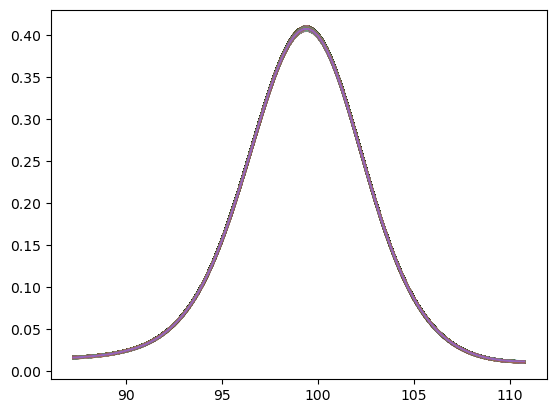

In [6]:
plt.plot(v_grid, CCF)
plt.show()

In [7]:
# plt.plot(v_grid, (CCF.T-np.mean(CCF,axis=1)).T)
# plt.show()

Daily averages

<ErrorbarContainer object of 3 artists>

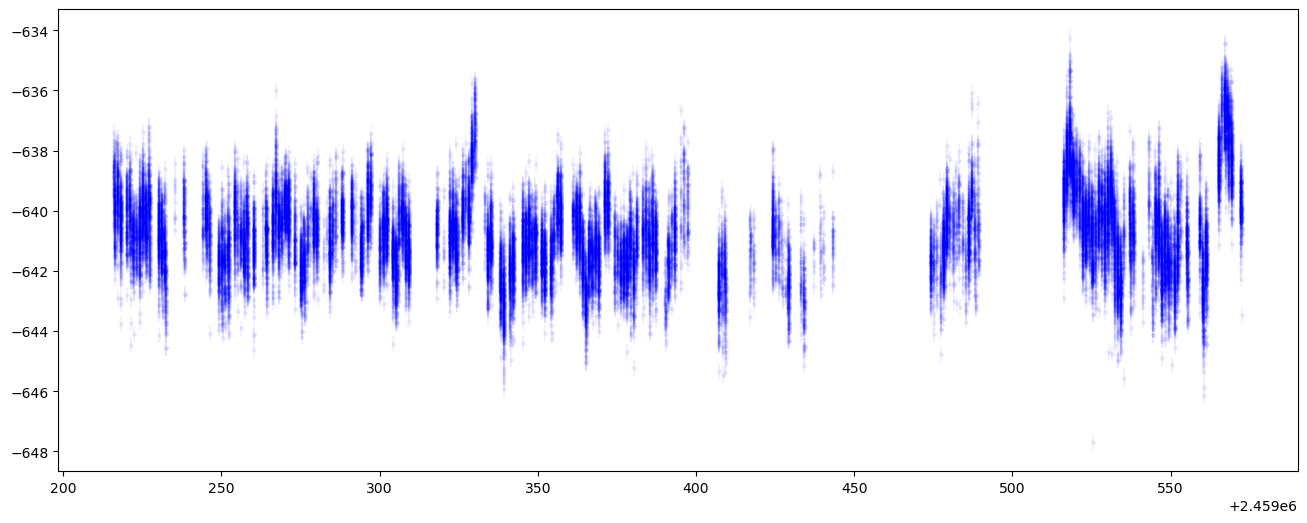

In [8]:
fig = plt.figure(figsize=(16, 6))
plt.errorbar(bjd, rv, σrv, marker='.', ms=5, color='blue', ls='none', alpha=0.05)

In [9]:
t_min = int(min(bjd))
t_max = int(max(bjd))
N = t_max -t_min + 1

bjd_daily 			= np.zeros(N)
CCF_daily 			= np.zeros((len(v_grid), N))
σCCF_daily			= np.zeros((len(v_grid), N))
rv_daily			= np.zeros(N)
# rv_raw_daily		= np.zeros(N)
σrv_daily			= np.zeros(N)

for n in range(N):
    idx = (bjd>(t_min+n)) & (bjd<(t_min+n+0.5))
    if len(bjd[idx])!=0:
        bjd_daily[n] = weighted_avg_1D(bjd[idx], 1/σrv[idx]**2)
        rv_daily[n] =  weighted_avg_1D(rv[idx], 1/σrv[idx]**2)
        σrv_daily[n] = 1/np.sqrt(np.sum(1/σrv[idx]**2))
        CCF_daily[:,n] = 1-weighted_avg_2D(1-CCF[:,idx], 1/σrv[idx]**2)
        σCCF_daily[:,n] = 1/np.sqrt(np.sum(1/σCCF[:,idx]**2, axis=1))

In [10]:
idx_0 		= (rv_daily==0)
rv_daily 	= rv_daily[~idx_0]
# rv_raw_daily= rv_raw_daily[~idx_0]
σrv_daily 	= σrv_daily[~idx_0]
bjd_daily 	= bjd_daily[~idx_0]
CCF_daily 	= CCF_daily[:,~idx_0]
σCCF_daily 	= σCCF_daily[:,~idx_0]

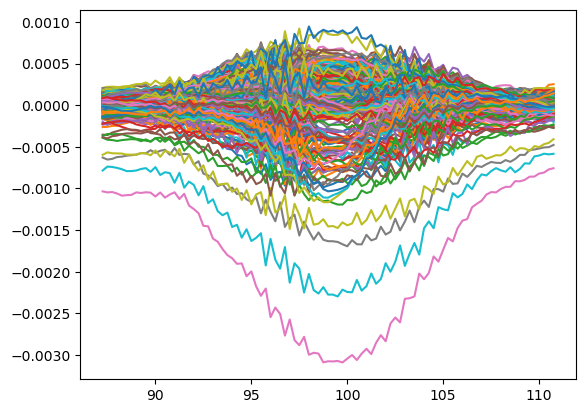

In [11]:
plt.plot(v_grid, (CCF_daily.T-np.mean(CCF_daily,axis=1)).T)
plt.show()

(-645.8110199849247, -635.8110199849247)

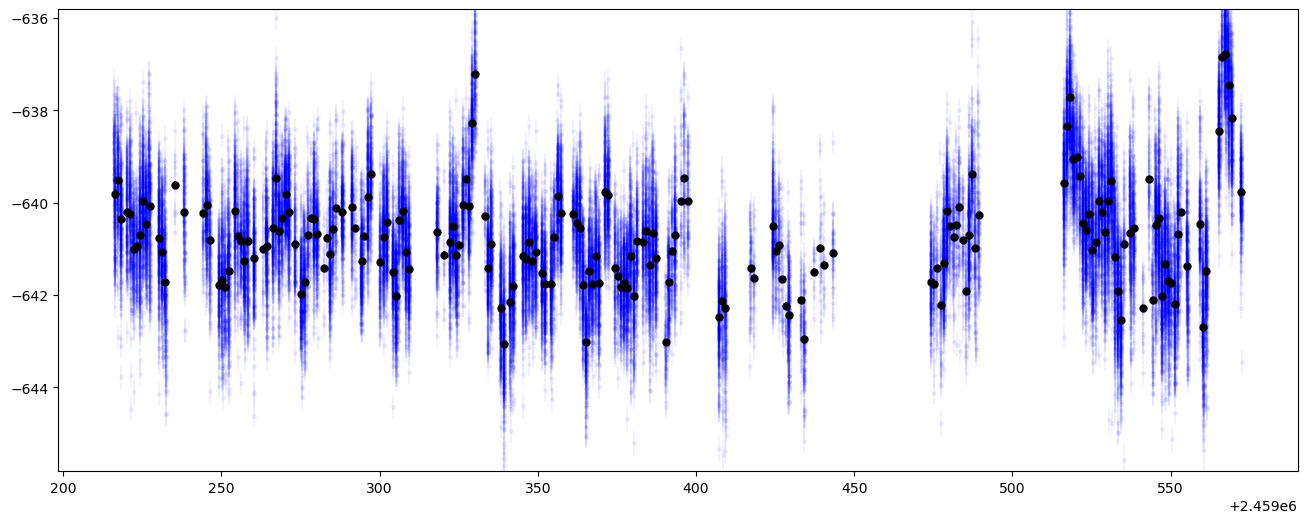

In [12]:
fig = plt.figure(figsize=(16, 6))
plt.errorbar(bjd, rv, σrv, marker='.', ms=5, color='blue', ls='none', alpha=0.05)
plt.errorbar(bjd_daily, rv_daily, σrv_daily, marker='.', ms=10, color='black', ls='none')
plt.ylim([np.median(rv)-5, np.median(rv)+5])


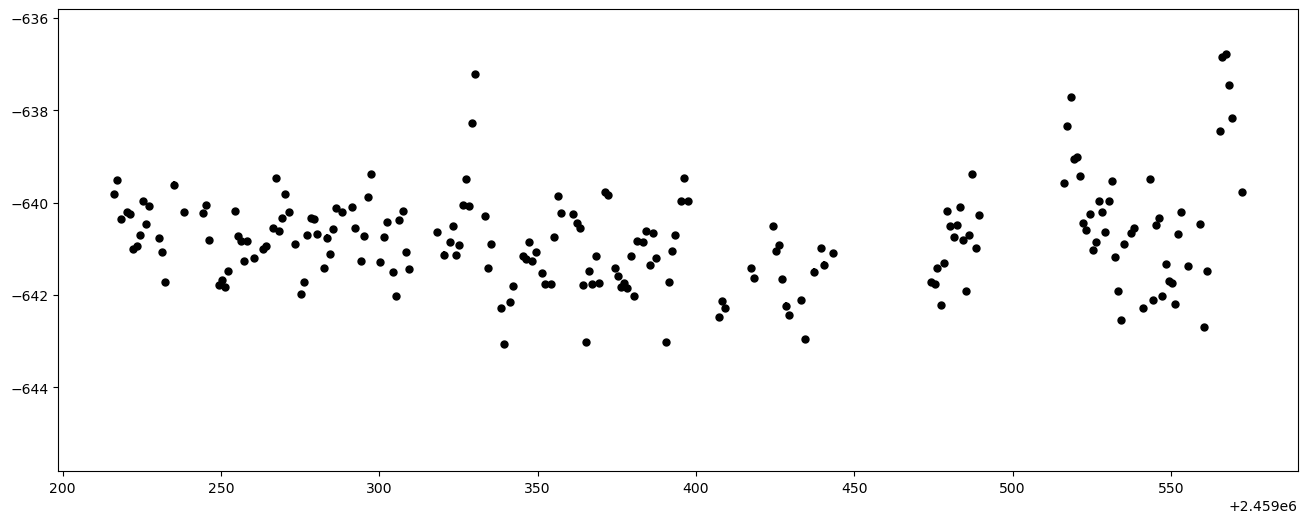

In [13]:
fig = plt.figure(figsize=(16, 6))
plt.errorbar(bjd_daily, rv_daily, σrv_daily, marker='.', ms=10, color='black', ls='none')
plt.ylim([np.median(rv)-5, np.median(rv)+5])
plt.show()

## FIESTA on daily CCF analysis

In [14]:
k_max = 55
df, RV_FT_k, eRV_FT_k, A_k, eA_k, RV_gauss = FIESTA(v_grid, CCF_daily, σCCF_daily, k_max=k_max)

RV_FT_k  *= 1000
eRV_FT_k *= 1000
RV_gauss *= 1000
ΔRV_k     = RV_FT_k - RV_gauss



Velocity grid used [87.25, 110.75]

ξ_normal = 1.98


The median SNR of all CCFs is 74808
ξ_modelling_noise = 1.98


Based on the user-defined SNR = 2.0:
ξ_individual = 1.98
ξ_timeseries = 1.73

In summary, the cut-off frequency for FIESTA is recommended to be 1.73 (41 frequency modes)

        ξ  individual_SNR  ts_SNR_A  ts_SNR_ϕ  modelling noise  \
0   0.000        179007.1     359.2       0.0          0.13662   
1   0.042        113824.0     125.4      34.6          0.04870   
2   0.084         42109.2      49.8      20.5          0.01186   
3   0.126         10340.3      25.6      11.7          0.00243   
4   0.168          2118.7      11.4       7.9          0.00055   
5   0.211           156.5       6.6      67.8          0.00052   
6   0.253           216.9       5.0       4.3          0.00045   
7   0.295           148.4       4.2       3.8          0.00042   
8   0.337           134.9       4.3       3.4          0.00039   
9   0.379           116.7       3.5       2.9      

## Plots 

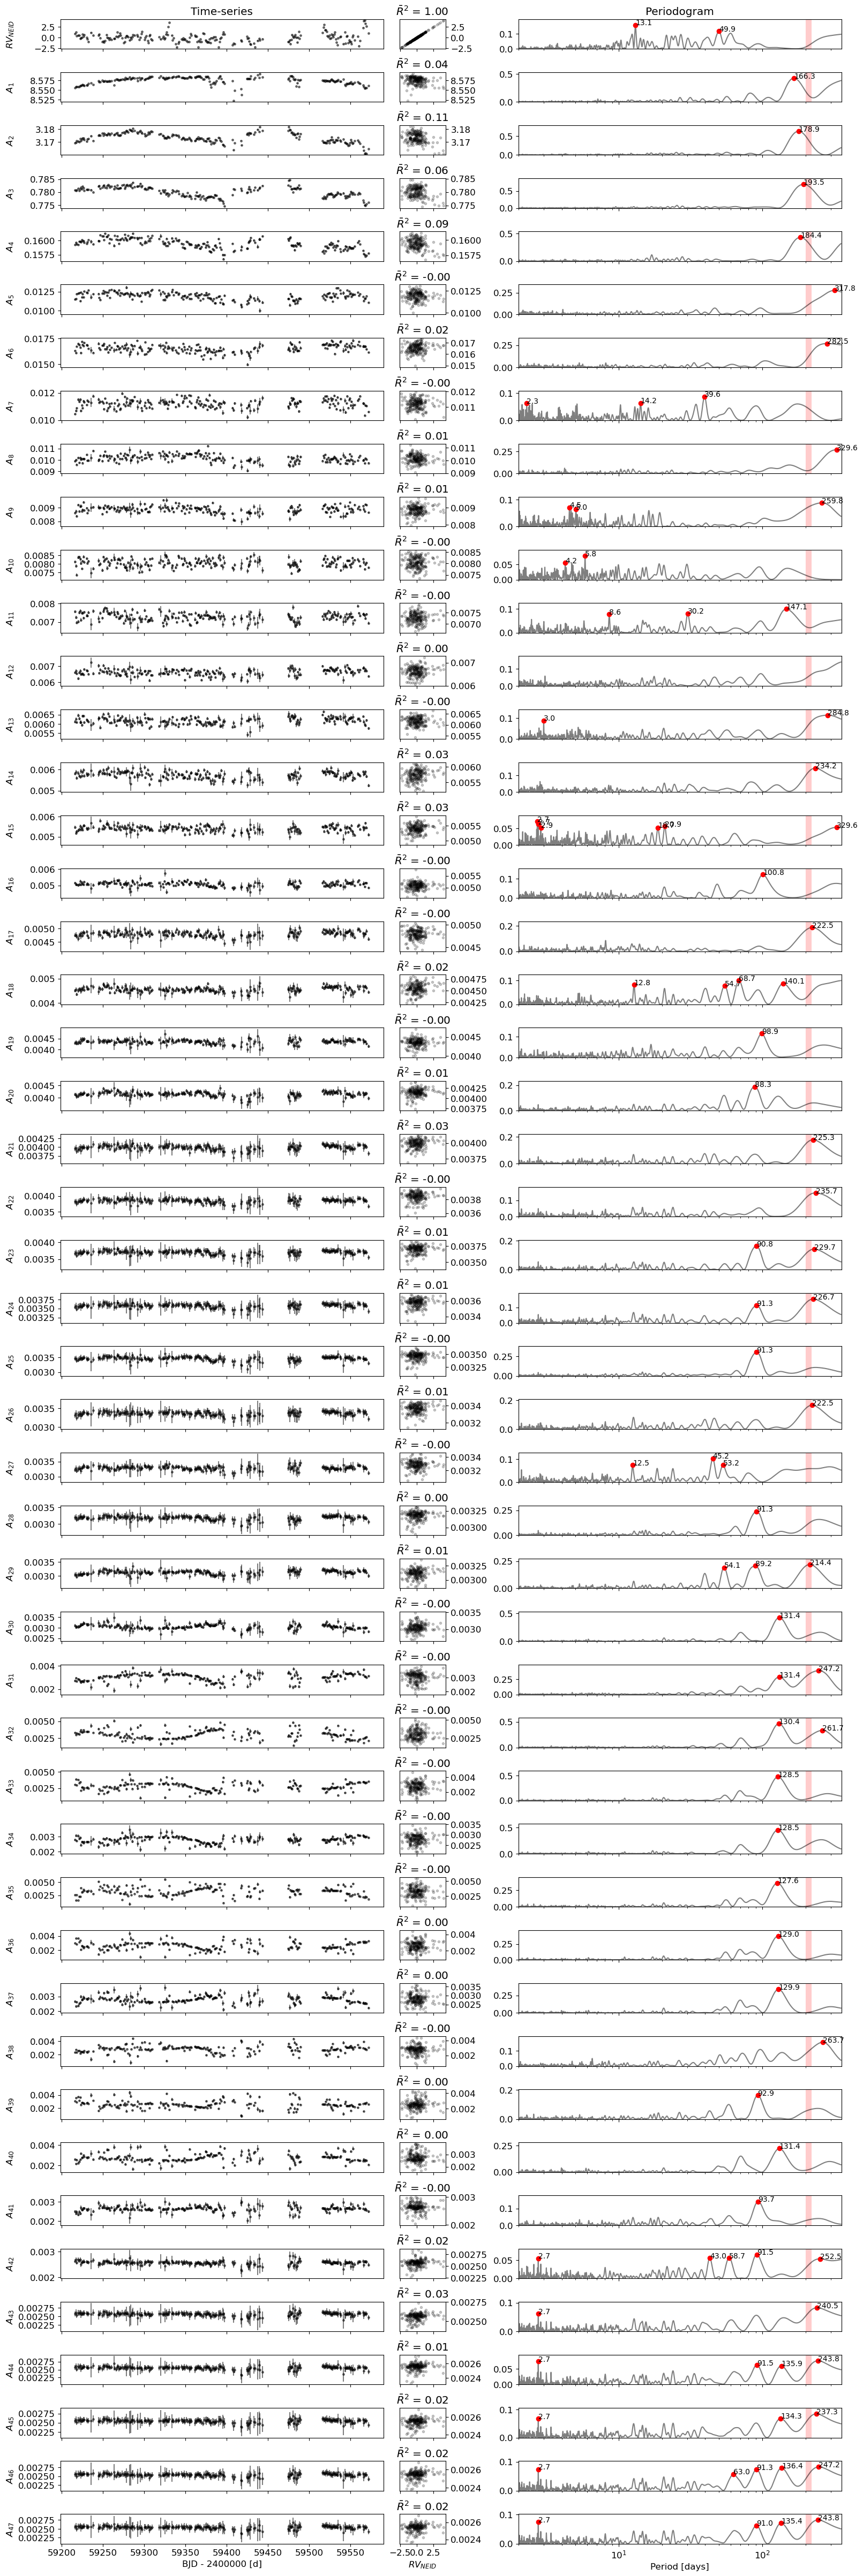

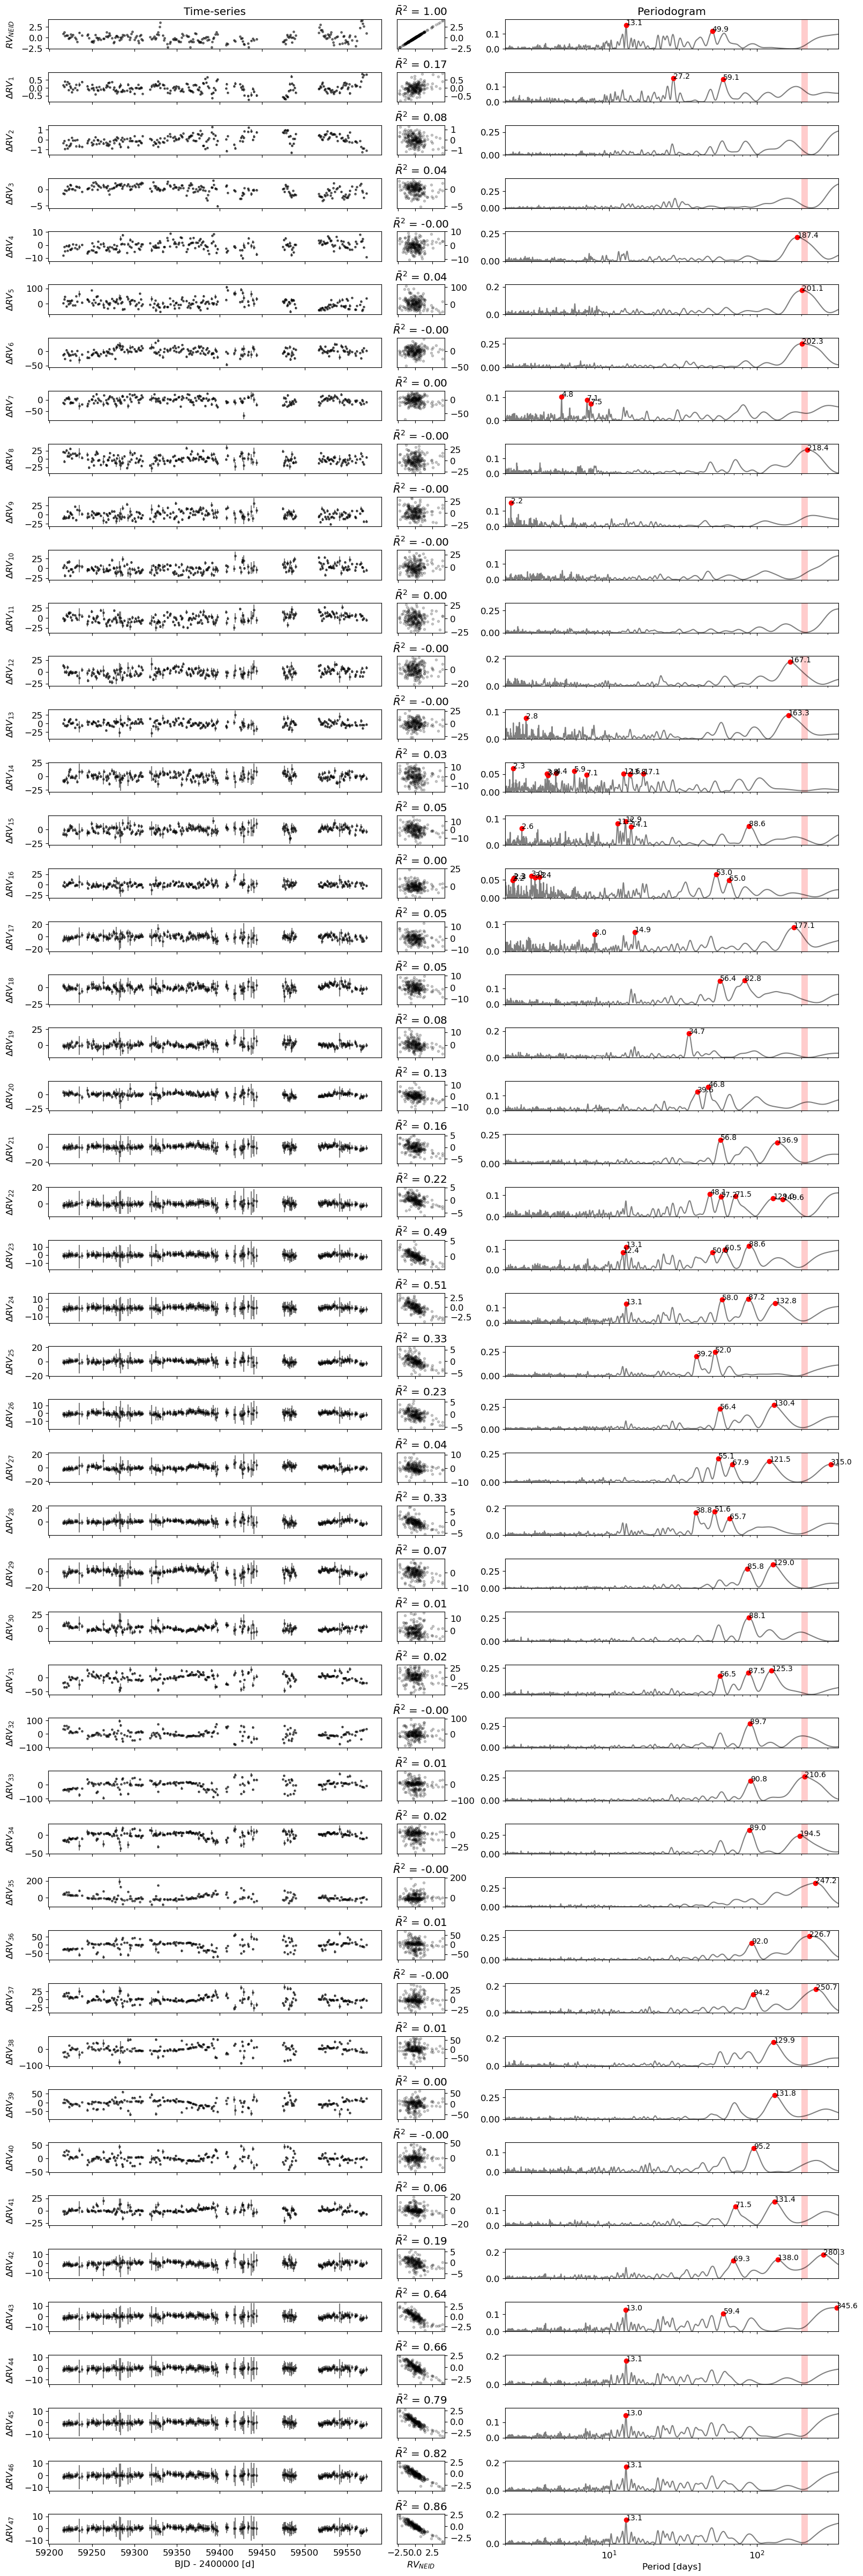

In [15]:
k_max = A_k.shape[0]

plot_all(k_mode=k_max, t=bjd_daily-2400000, rv=rv_daily, erv=σrv_daily, 
    ind=A_k, eind=eA_k, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$A$',
    file_name='')
plt.show()

plot_all(k_mode=k_max, t=bjd_daily-2400000, rv=rv_daily, erv=σrv_daily, 
    ind=ΔRV_k, eind=eRV_FT_k, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$\Delta RV$',
    file_name='')
plt.show()

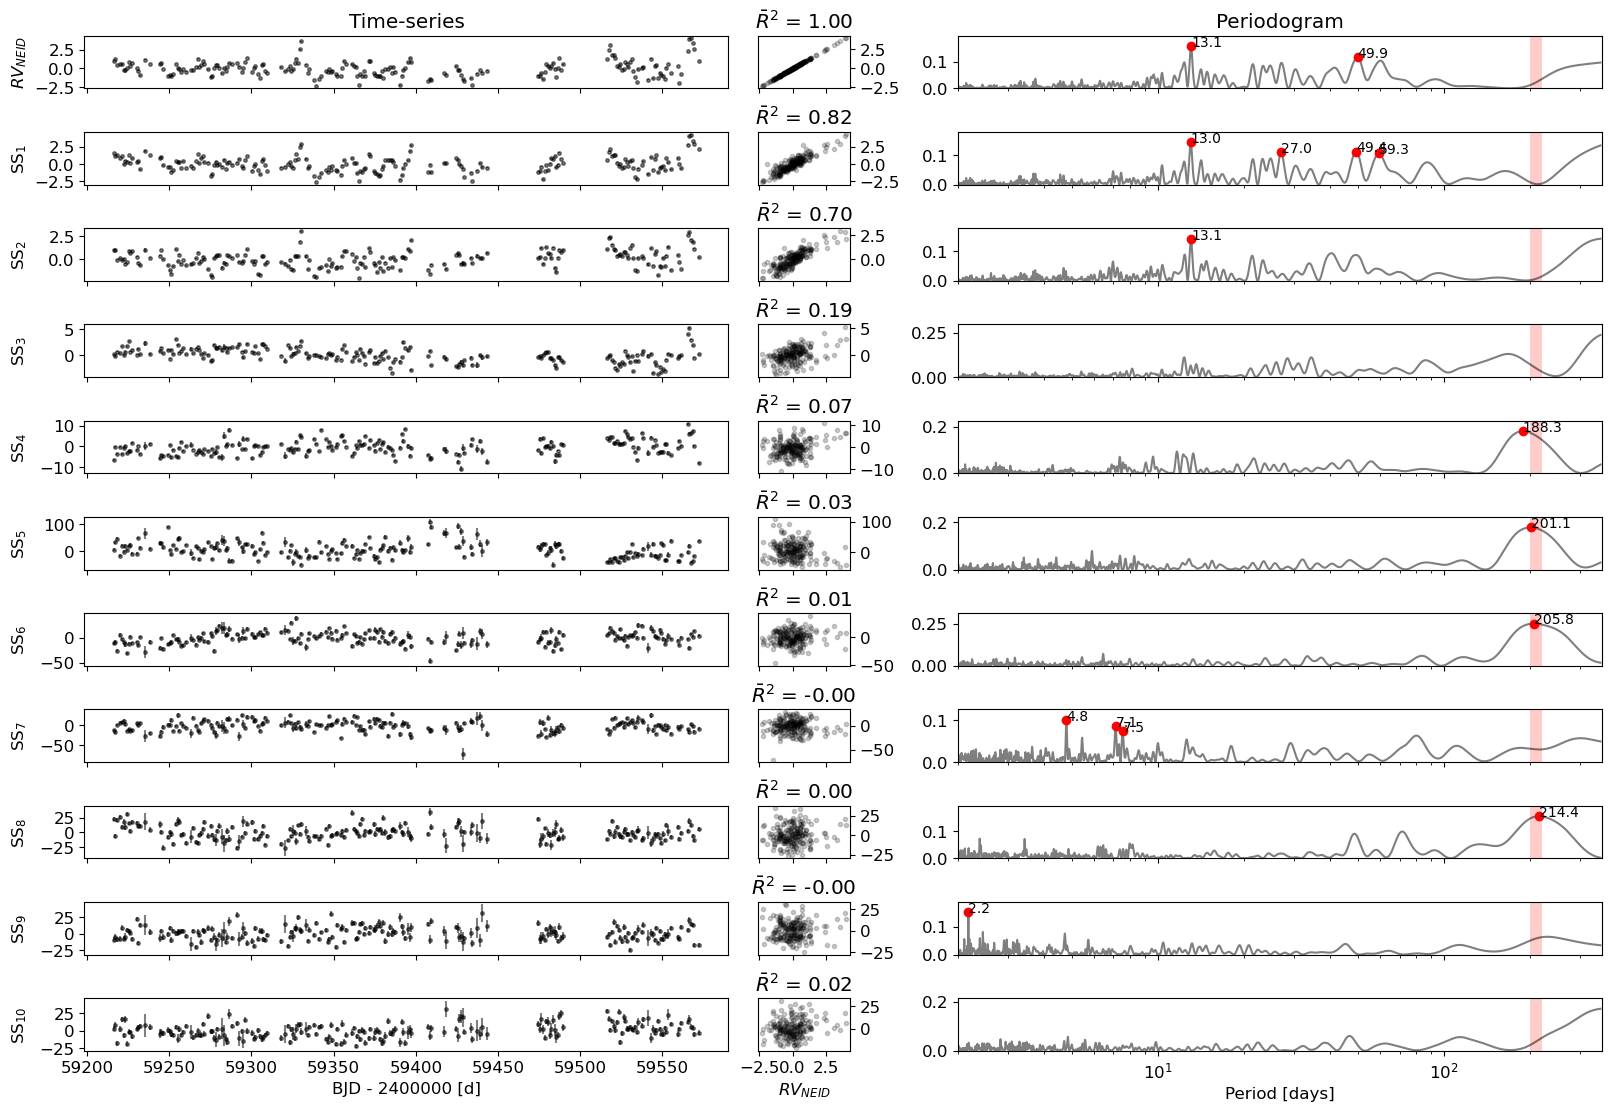

In [16]:
plot_all(k_mode=10, t=bjd_daily-2400000, rv=rv_daily, erv=σrv_daily, 
    ind=RV_FT_k, eind=eRV_FT_k, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel='SS',
    file_name='')
plt.show()

# PCA

In [17]:
k_max = 47
PC, weighted_pca_score, err_weighted_pca_score, n_pca = weighted_pca(X=ΔRV_k[:k_max,:].T, X_err=eRV_FT_k[:k_max,:].T, nor=False)

Cumulative variance explained vs PCA components
1 	 44.206
2 	 61.858
3 	 77.911
4 	 82.338
5 	 86.273
6 	 89.251
7 	 91.666
8 	 93.685
9 	 95.150
10 	 96.414
11 	 97.417
12 	 98.181
13 	 98.888
14 	 99.397
15 	 99.880
16 	 100.233
17 	 100.560
18 	 100.801
19 	 100.997
20 	 101.164
21 	 101.274
22 	 101.361
23 	 101.413
24 	 101.448
25 	 101.476
26 	 101.492
27 	 101.502
28 	 101.509
29 	 101.515
30 	 101.519
31 	 101.523
32 	 101.526
33 	 101.529
34 	 101.531
35 	 101.532
36 	 101.534
37 	 101.534
38 	 101.535
39 	 101.535
40 	 101.535
41 	 101.535
42 	 101.535
43 	 101.535
44 	 101.533
45 	 101.394
46 	 101.129
47 	 100.000
7 pca scores account for 91.67% variance explained
Standard deviations of each component and the midean uncertainty are
 [61.6 35.  29.5 15.  14.  11.6 10.9] 
 [3.1 3.4 4.5 3.5 3.3 3.5 3.5]


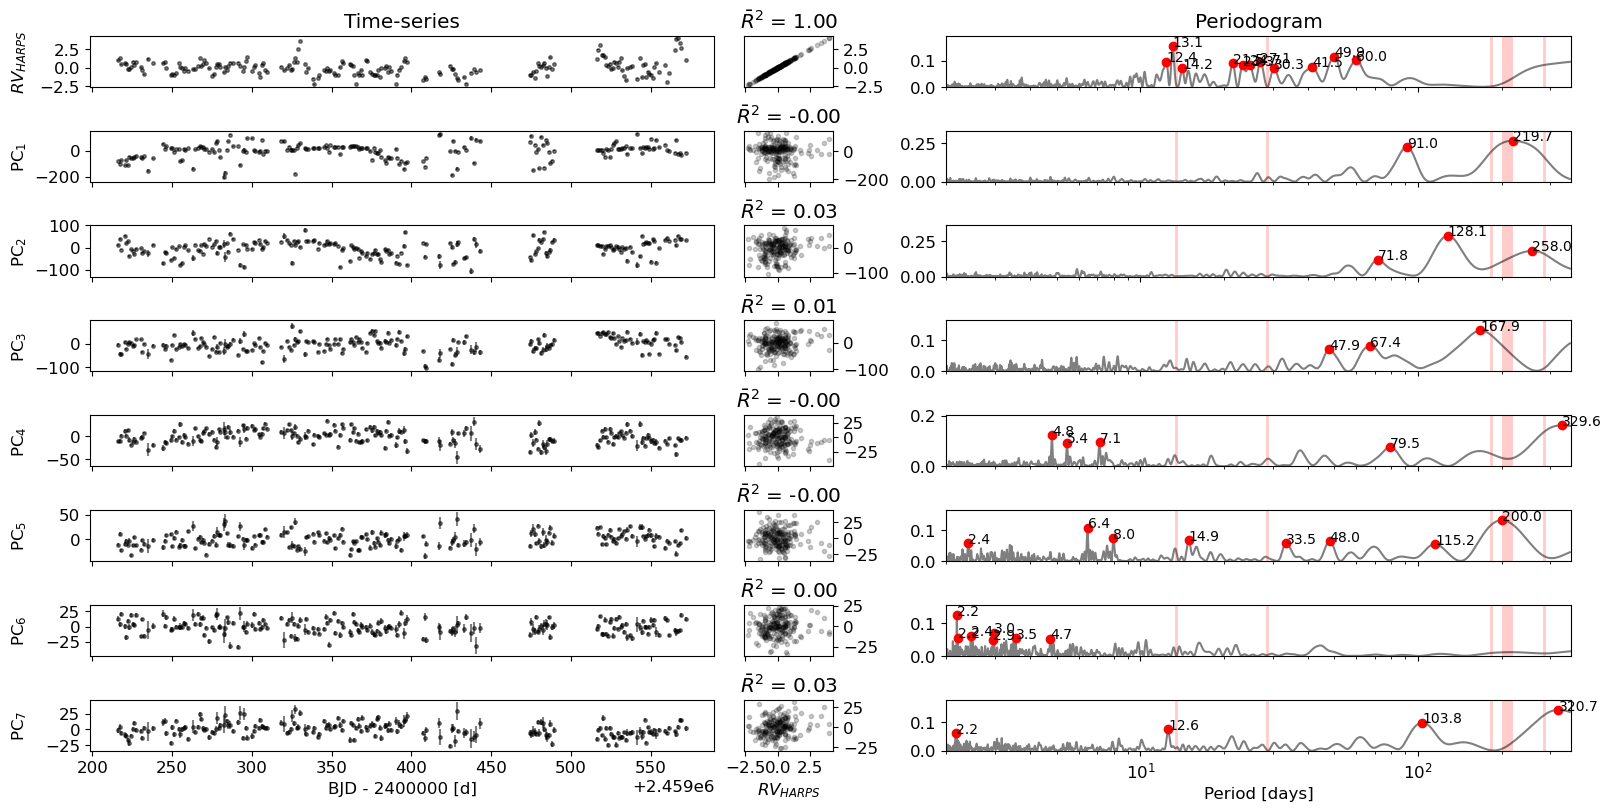

In [18]:
plot_all(k_mode=7, t=bjd_daily, rv=rv_daily, erv=σrv_daily, 
    vlines = [13.4, 28.5, 365/2, 285, 400],
    ind=weighted_pca_score.T, eind=err_weighted_pca_score.T, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{HARPS}$', 
    pe_xlabel='Period [days]',
    ind_yalbel='PC',
    height_ratio=0.4,
    file_name='')

# MLP

In [19]:
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses
from sklearn.utils import shuffle

# print(tf.VERSION)
print(tf.keras.__version__)

2.10.0


In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# def model_MLP(X, Y, lr_model, batch_size=64, epochs=200, learning_rate=2e-4):
def model_MLP(X, Y, lr_model, epochs=200, learning_rate=2e-4):

    scaler = StandardScaler()
    scaler.fit_transform(X)
    x_train, x_test, y_train, y_test, t_train, t_test, σrv_train, σrv_test = train_test_split(X, Y, bjd_daily, σrv_daily, test_size=0.3, random_state=40)
    x_train.shape, x_test.shape

    batch_size= x_train.shape[0]
    input_dim = x_train.shape[1]

    ###################
    # hyperparameters #
    ###################
    # 1st to play with learning rate
    # 2nd batch size 
    # then epochs and activation functions 
    # batch_size = batch_size
    # epochs=epochs
    adam = Adam(learning_rate=learning_rate)

    # def custom_mse(y_test, y_pred):
        # import keras.backend as K
        # # calculating squared difference between target and predicted values 
        # loss = K.square( (y_pred - y_test) / σrv_test)  # (batch_size, 2)                    
        # # summing both loss values along batch dimension 
        # loss = K.sum(loss, axis=1) / K.sum(K.square(1/σrv_test))        # (batch_size,)
        # return loss
        # loss = sum(((y_pred-y_test)/σrv_test)**2) / sum((1/σrv_test)**2) # (batch_size, 2)                    
        # return loss
    
    def custom_mse(y_test, y_pred):
        squared_difference = tf.dtypes.cast(tf.square((y_test - y_pred)/σrv_test), tf.float64) 
        return tf.dtypes.cast(tf.reduce_mean(squared_difference/tf.square(1/σrv_test), axis=-1), tf.float64)  # Note the `axis=-1`
    
    # compile the model
    lr_model.compile(loss=custom_mse,
                  optimizer=adam,
                  metrics=[custom_mse])

    # from keras.callbacks import EarlyStopping
    # earlystop = EarlyStopping(monitor = 'val_mse',
    #                           min_delta = 0,
    #                           patience = 3,
    #                           verbose = 0,
    #                           restore_best_weights = True)

    # callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

    ### Fit the model
    lr_model_history = lr_model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        # callbacks = [callback],
                        validation_data=(x_test, y_test))

    fig, ax = plt.subplots(1, 1)
    ax.plot(np.sqrt(lr_model_history.history['loss']), 'b', label='train')    
    ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'r' ,label='test')
    
    ax.set_xlabel(r'Epoch')
    ax.set_ylabel(r'wmse')
    ax.set_yscale('log')
    ax.legend()
    ax.tick_params(labelsize=20)
    # ax.set_xlim([20, epochs])
    # ax.set_ylim([0, 2])
    plt.show()
    
    
    y_pred = lr_model.predict(x_test)
    plt.plot(t_test, y_test, 'r.', label='test')
    plt.plot(t_test, y_pred, 'k.', label='pred')
    plt.ylabel('RV [m/s]')
    plt.legend()
    plt.show()

    plt.plot(y_test, y_pred, 'b.')
    plt.xlabel('test [m/s]')
    plt.ylabel('pred [m/s]')
    plt.show()    
    
    print(weighted_avg_and_std(y_pred[:,0]-y_test, 1/σrv_test**2))
    
    return y_test, y_pred[:,0]
    

(202, 47) (202,)


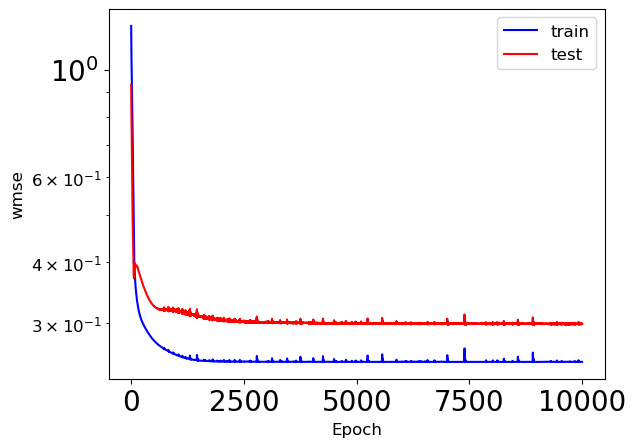

2/2 [==============================] - 0s 2ms/step


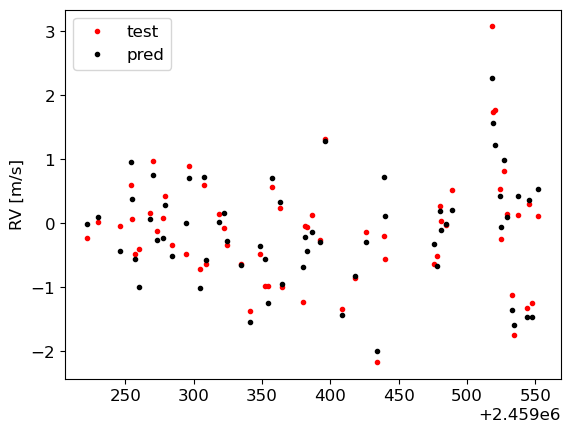

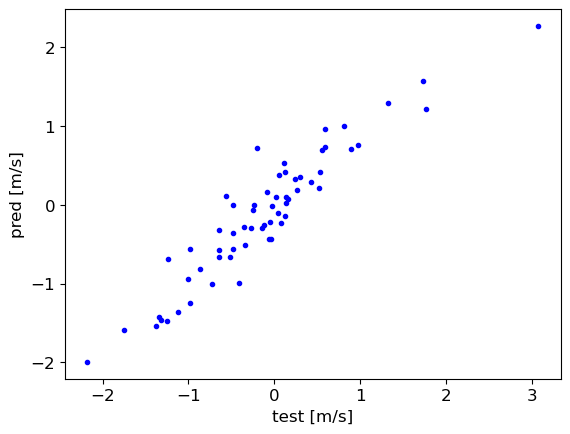

(-0.027857087358382264, 0.27665915546044123)


In [77]:
# X = ΔRV_k.T[:,0:10]
X = ΔRV_k.T
Y = rv_daily - np.mean(rv_daily)
print(X.shape, Y.shape)
###################
# build the model #
###################
input_dim = X.shape[1]
lr_model = Sequential()
# lr_model.add(Dense(32, activation=tf.nn.relu, kernel_initializer='uniform', 
#                 input_dim = input_dim)) 
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(16, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                input_dim = input_dim)) # add bias term!
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.tanh))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

y_test, y_pred = model_MLP(X, Y, lr_model, epochs=10000, learning_rate=1e-3)

(202, 23) (202,)


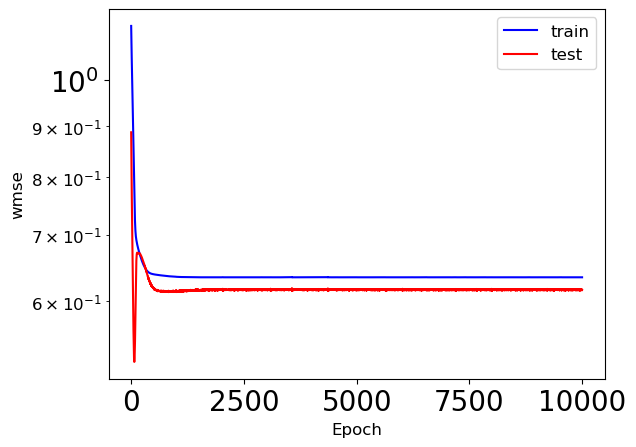

2/2 [==============================] - 0s 2ms/step


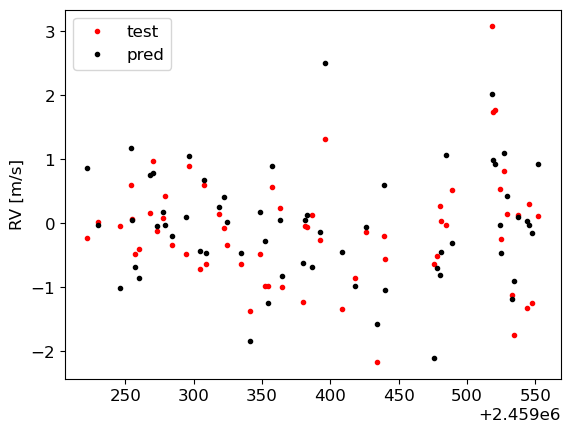

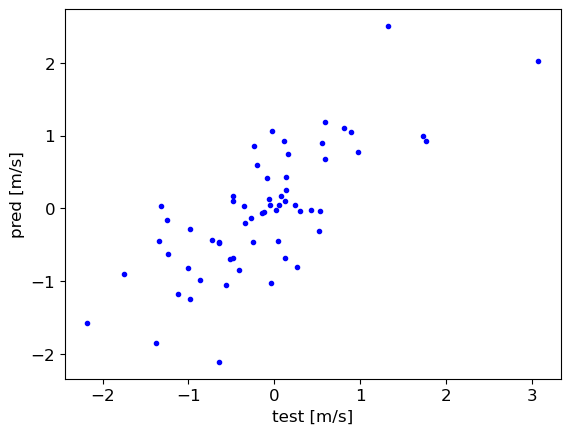

(0.07610506700843282, 0.5386495811496397)


In [81]:
X = ΔRV_k.T[:,0:23]
# X = ΔRV_k.T
Y = rv_daily - np.mean(rv_daily)
print(X.shape, Y.shape)
###################
# build the model #
###################
input_dim = X.shape[1]
lr_model = Sequential()
# lr_model.add(Dense(32, activation=tf.nn.relu, kernel_initializer='uniform', 
#                 input_dim = input_dim)) 
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(16, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                input_dim = input_dim)) # add bias term!
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.tanh))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

y_test, y_pred = model_MLP(X, Y, lr_model, epochs=10000, learning_rate=1e-3)

(202, 47) (202,)


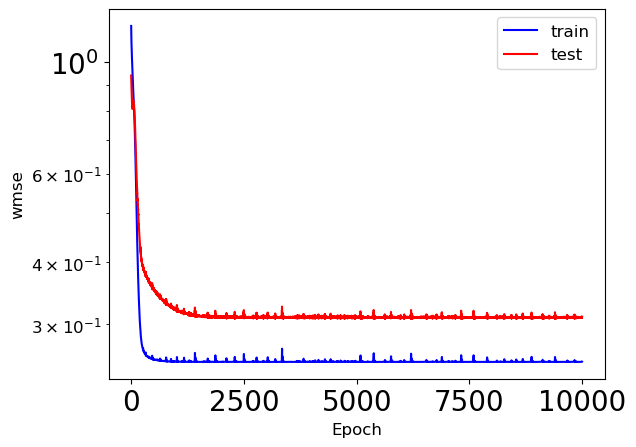

2/2 [==============================] - 0s 2ms/step


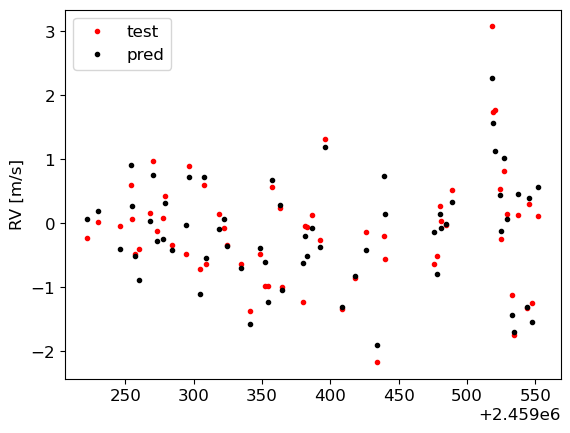

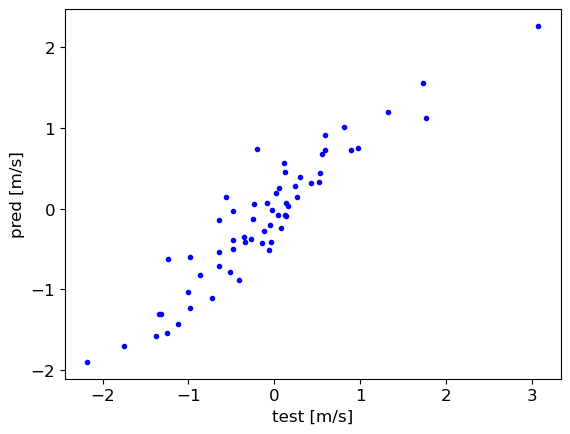

(-0.04068034136496546, 0.28199822846491707)


In [80]:
# X = ΔRV_k.T[:,0:10]
X = RV_FT_k.T
Y = rv_daily - np.mean(rv_daily)
print(X.shape, Y.shape)
###################
# build the model #
###################
input_dim = X.shape[1]
lr_model = Sequential()
# lr_model.add(Dense(32, activation=tf.nn.relu, kernel_initializer='uniform', 
#                 input_dim = input_dim)) 
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(16, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                input_dim = input_dim)) # add bias term!
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.tanh))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

y_test, y_pred = model_MLP(X, Y, lr_model, epochs=10000, learning_rate=1e-3)

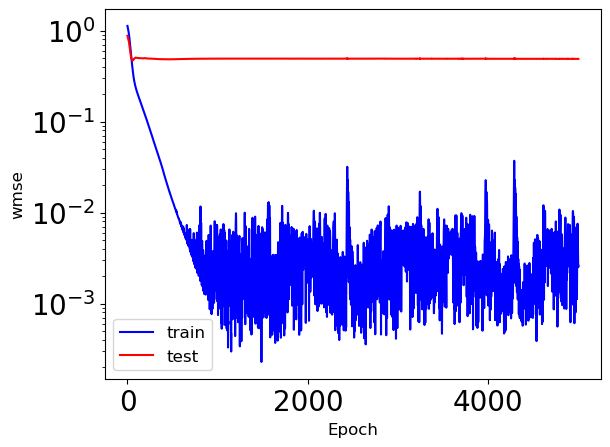

2/2 [==============================] - 0s 3ms/step


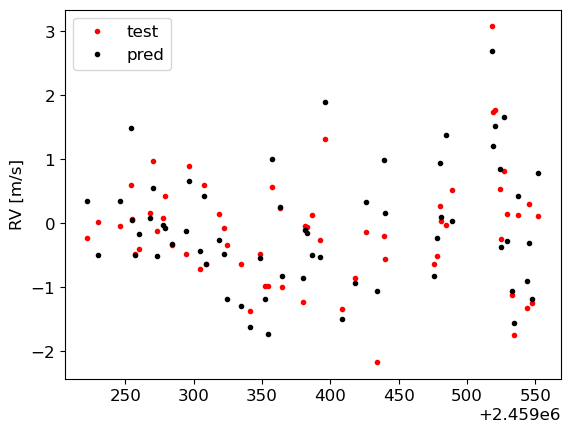

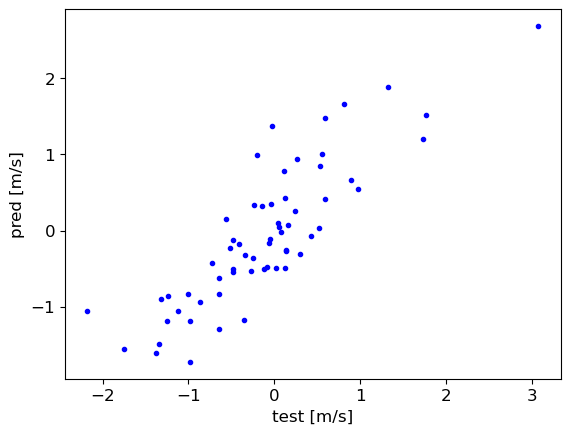

(-0.037242176695651934, 0.44133297072564814)


In [79]:
lr_model = Sequential()
lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

y_test, y_pred = model_MLP(X, Y, lr_model, epochs=5000, learning_rate=1e-3)

(202, 47) (202,)


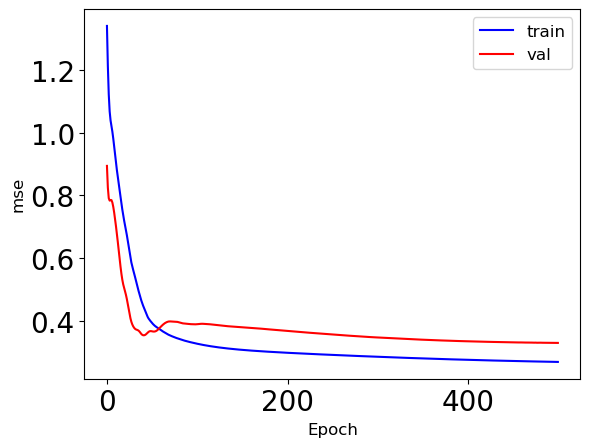

2/2 [==============================] - 0s 2ms/step


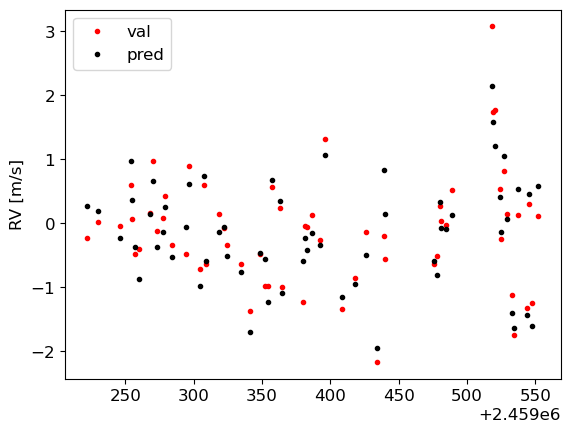

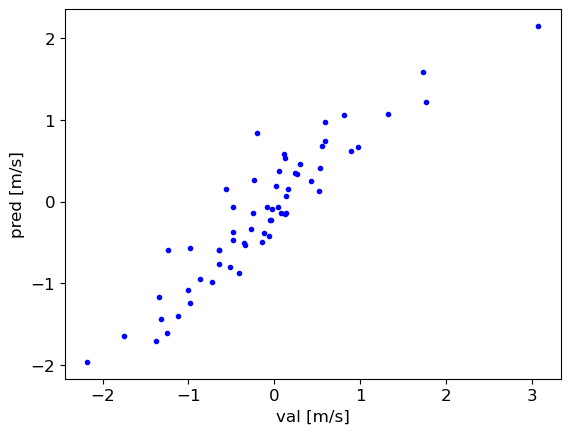

0.3283413927221278


In [22]:
# X = ΔRV_k.T[:,0:10]
X = ΔRV_k.T
Y = rv_daily - np.mean(rv_daily)
print(X.shape, Y.shape)
###################
# build the model #
###################
input_dim = X.shape[1]
lr_model = Sequential()
# lr_model.add(Dense(32, activation=tf.nn.relu, kernel_initializer='uniform', 
#                 input_dim = input_dim)) 
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(40, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                input_dim = input_dim)) # add bias term!
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.tanh))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

y_test, y_pred = model_MLP(X, Y, lr_model, epochs=500, learning_rate=1e-3)

(202, 47) (202,)


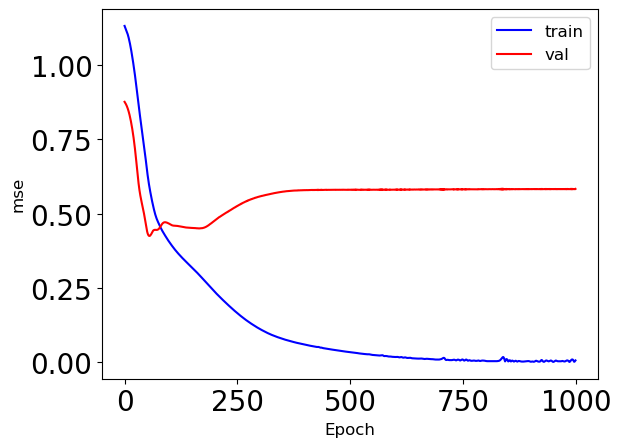

2/2 [==============================] - 0s 3ms/step


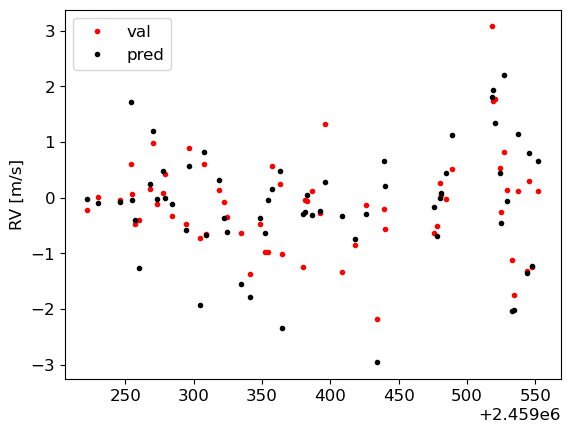

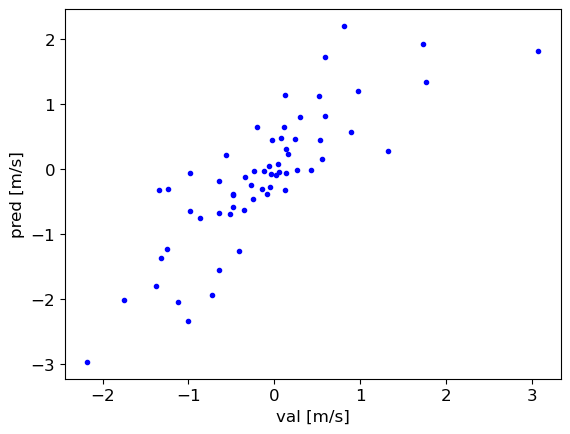

0.583510807796703


In [23]:
# X = ΔRV_k.T[:,0:10]
X = ΔRV_k.T
Y = rv_daily - np.mean(rv_daily)
print(X.shape, Y.shape)
###################
# build the model #
###################
input_dim = X.shape[1]
lr_model = Sequential()
# lr_model.add(Dense(32, activation=tf.nn.relu, kernel_initializer='uniform', 
#                 input_dim = input_dim)) 
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(16, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                input_dim = input_dim)) # add bias tern!
# lr_model.add(Dropout(0.1))
# lr_model.add(Dense(40, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(4, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.tanh))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

y_test, y_pred = model_MLP(X, Y, lr_model, epochs=1000, learning_rate=1e-3)



(202, 30) (202,)


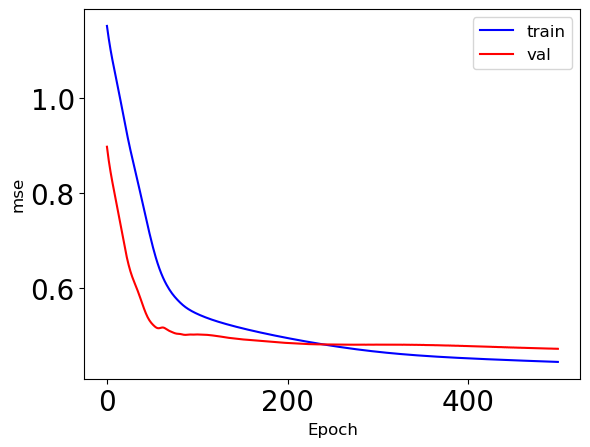

2/2 [==============================] - 0s 2ms/step


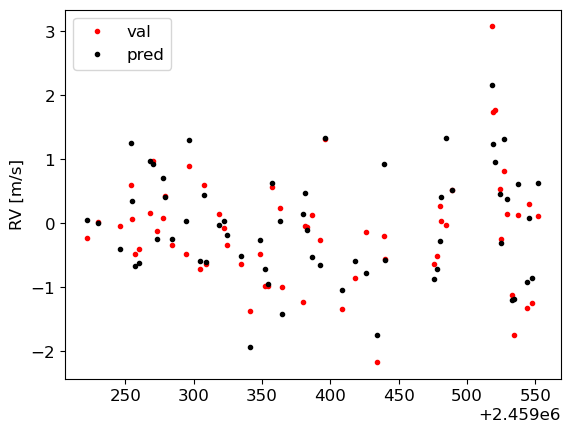

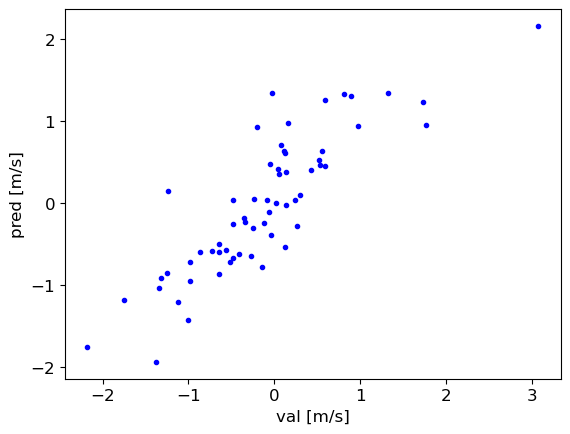

0.4620594069146468


In [24]:
X = ΔRV_k.T[:,0:30]
# X = ΔRV_k.T
Y = rv_daily - np.mean(rv_daily)
print(X.shape, Y.shape)
###################
# build the model #
###################
input_dim = X.shape[1]
lr_model = Sequential()
# lr_model.add(Dense(32, activation=tf.nn.relu, kernel_initializer='uniform', 
#                 input_dim = input_dim)) 
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(16, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                input_dim = input_dim)) # add bias term!
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.tanh))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

y_test, y_pred = model_MLP(X, Y, lr_model,  epochs=500, learning_rate=1e-3)

(202, 95) (202,)


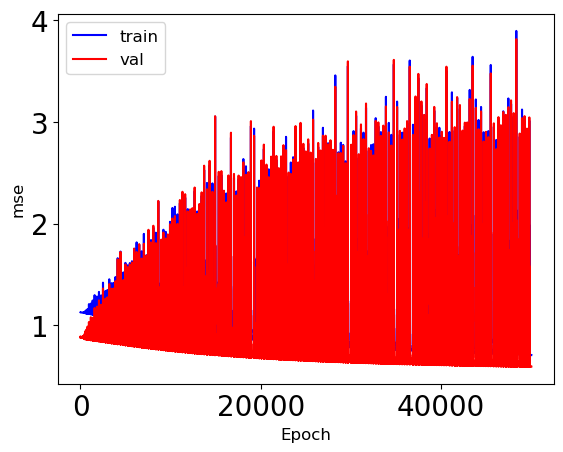

2/2 [==============================] - 0s 2ms/step


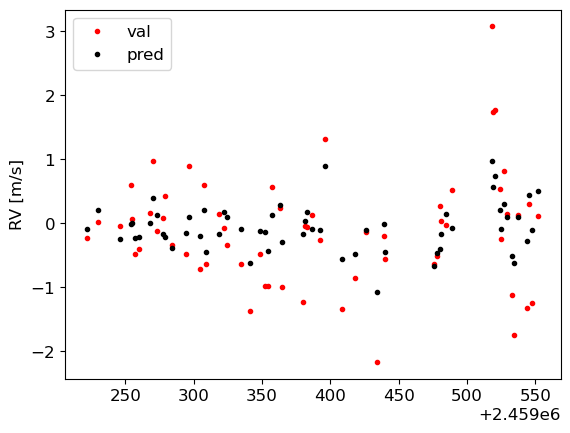

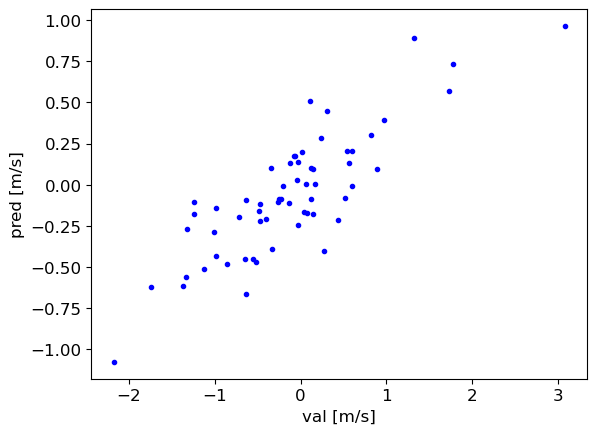

0.5926353713561275


In [28]:
X = CCF_daily.T
Y = rv_daily - np.mean(rv_daily)
print(X.shape, Y.shape)
###################
# build the model #
###################
input_dim = X.shape[1]
lr_model = Sequential()
# lr_model.add(Dense(32, activation=tf.nn.relu, kernel_initializer='uniform', 
#                 input_dim = input_dim)) 
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(16, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                input_dim = input_dim)) # add bias term!
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.tanh))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

y_test, y_pred = model_MLP(X, Y, lr_model,  epochs=50000, learning_rate=5e-3)